# Лабораторная работа 1. Линейная регрессия и факторный анализ.
**Цель работы:** изучение основ линейной регрессии, построение простейших моделей регрессии, проведение обучения модели на реальных данных и оценка её качества.

**Датасет:** https://www.kaggle.com/datasets/mustafamaher2520/student-performance-data

**Описание:**

Этот набор данных содержит подробные записи об учениках с указанием их академической успеваемости по 100-балльной шкале. В него включены различные факторы, которые могут влиять на результаты учащихся, такие как среднее количество часов сна за ночь, уровень стресса по самооценке по шкале от 1 до 10, предыдущие результаты экзаменов и ежедневное количество часов, затрачиваемых на учёбу. Каждый ученик имеет уникальный идентификационный номер.

| Переменная | Описание |
| :---: | :--- |
| Student_ID | Уникальный идентификатор для каждого студента (Исключаем, т.к. не нужен) |
| Performance_Score | Академическая успеваемость (0–100) (**Зависимая переменная**) |
| Sleep_Hours | Среднее количество часов сна за ночь |
| Stress_Level | Уровень стресса по самоотчету (1 — очень низкий, 10 — очень высокий) |
| Previous_Exam_Scores | Результаты предыдущих экзаменов (0–100) |
| Study_Hours | Среднее ежедневное время учебы в часах |

## 1. Загрузка датасета из репозитория

In [6]:
import pandas as pd

df = pd.read_csv('StdPerfScore.csv')
df = df.drop(columns=['Student_ID'])
print(df)

     Performance_Score  Sleep_Hours  ...  Previous_Exam_Scores  Study_Hours
0                28.70         4.40  ...                 87.20         4.30
1                33.50         7.50  ...                 72.10         3.90
2                40.50         8.70  ...                 62.20         3.80
3                44.80         6.60  ...                 80.80         4.70
4                36.80         8.50  ...                 53.20         7.20
..                 ...          ...  ...                   ...          ...
317              25.91         5.34  ...                 50.80         3.55
318              45.97         7.66  ...                 62.37         5.58
319              30.49         5.22  ...                 67.45         5.99
320              37.94         7.74  ...                 39.76         5.08
321              27.17         7.72  ...                 42.67         2.76

[322 rows x 5 columns]


## 2. Подготовка данных: первичный анализ, визуализация распределения признаков и целевой переменной

### Первичный анализ:

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Performance_Score     322 non-null    float64
 1   Sleep_Hours           322 non-null    float64
 2   Stress_Level          322 non-null    float64
 3   Previous_Exam_Scores  322 non-null    float64
 4   Study_Hours           322 non-null    float64
dtypes: float64(5)
memory usage: 12.7 KB
None


По выводу видно типы данных переменных и отсутсвие пустых (NaN) значений.

In [8]:
print(df.describe())

       Performance_Score  Sleep_Hours  ...  Previous_Exam_Scores  Study_Hours
count         322.000000   322.000000  ...            322.000000   322.000000
mean           30.966118     7.079938  ...             63.325186     4.036180
std             8.346712     1.479526  ...             14.544545     1.999453
min             6.070000     3.140000  ...             15.110000     0.000000
25%            25.305000     6.132500  ...             53.577500     2.692500
50%            31.135000     7.060000  ...             63.385000     3.900000
75%            36.512500     7.940000  ...             71.787500     5.367500
max            60.430000    11.000000  ...            100.000000     9.190000

[8 rows x 5 columns]


### Визуализация распределений:

Performance_Score
Ассиметрия: -0.047
Эксцесс: 0.265
Колмогорова-Смирнова p-value: 0.991
Колмогорова-Смирнова статистика: 0.024
Колмогорова-Смирнова нормальность: Да
Уровень значимости: 0.05

Sleep_Hours
Ассиметрия: 0.038
Эксцесс: -0.111
Колмогорова-Смирнова p-value: 0.769
Колмогорова-Смирнова статистика: 0.037
Колмогорова-Смирнова нормальность: Да
Уровень значимости: 0.05

Stress_Level
Ассиметрия: -0.151
Эксцесс: -0.488
Колмогорова-Смирнова p-value: 0.448
Колмогорова-Смирнова статистика: 0.047
Колмогорова-Смирнова нормальность: Да
Уровень значимости: 0.05

Previous_Exam_Scores
Ассиметрия: 0.002
Эксцесс: 0.158
Колмогорова-Смирнова p-value: 0.679
Колмогорова-Смирнова статистика: 0.040
Колмогорова-Смирнова нормальность: Да
Уровень значимости: 0.05

Study_Hours
Ассиметрия: 0.012
Эксцесс: -0.454
Колмогорова-Смирнова p-value: 0.825
Колмогорова-Смирнова статистика: 0.035
Колмогорова-Смирнова нормальность: Да
Уровень значимости: 0.05



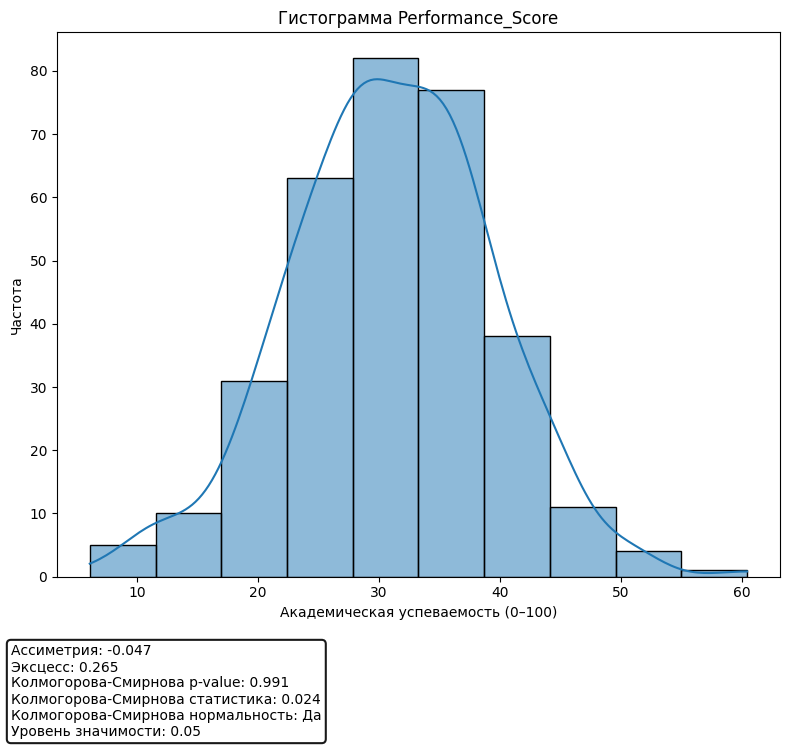

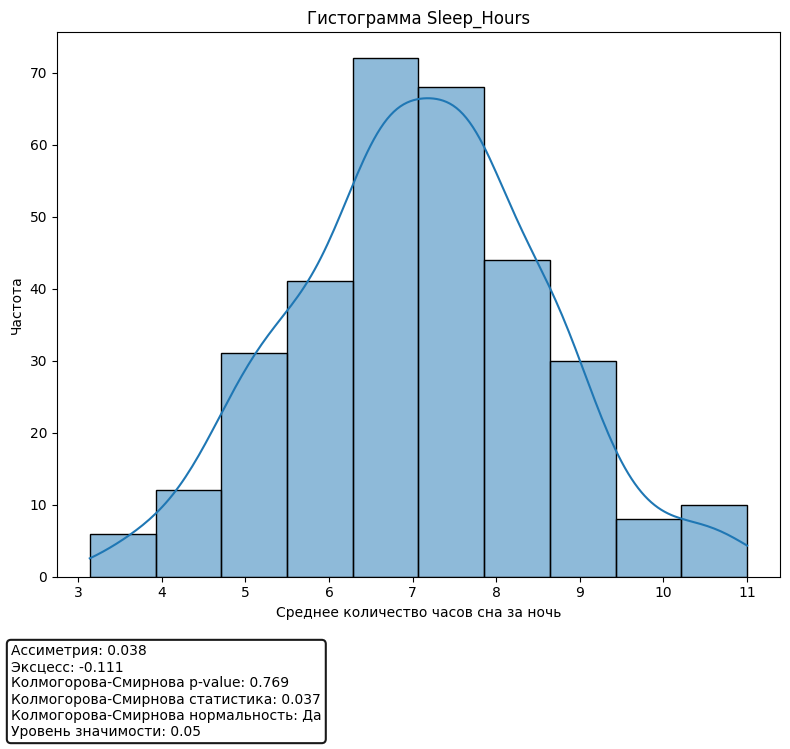

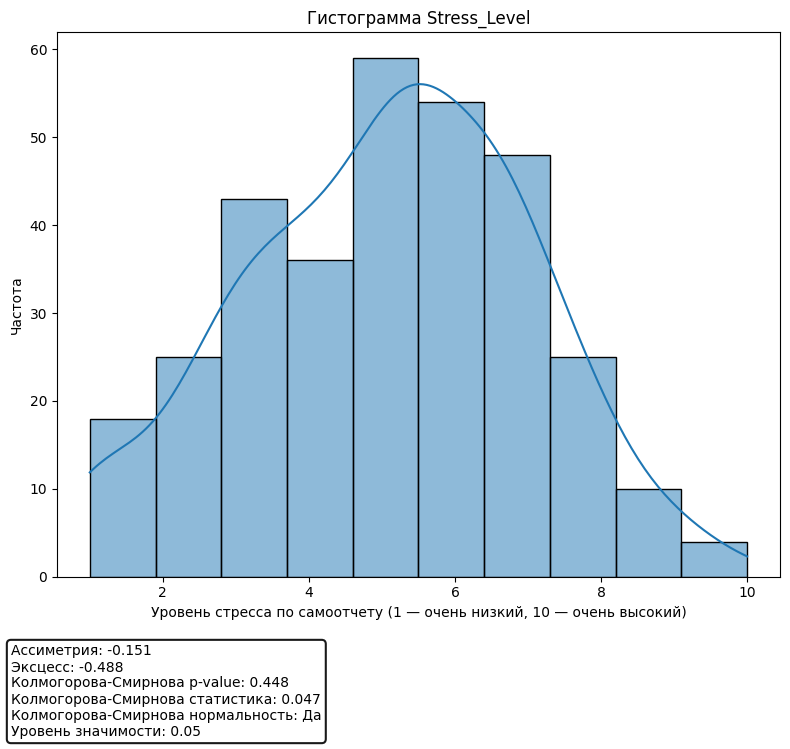

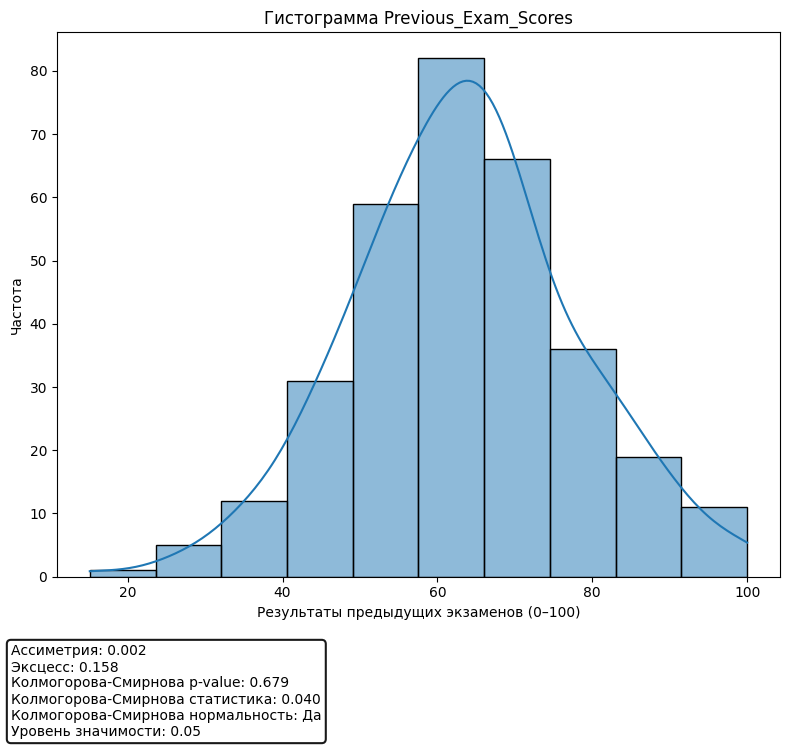

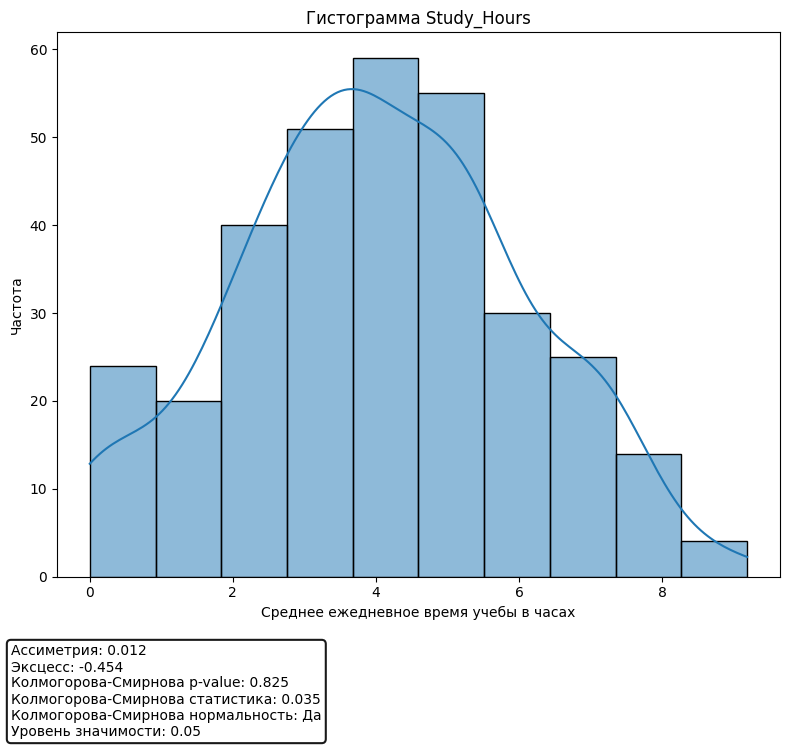

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import skew, kurtosis, kstest

ALPHA = 0.05

descriptions = {
    'Performance_Score': 'Академическая успеваемость (0–100)',
    'Sleep_Hours': 'Среднее количество часов сна за ночь',
    'Stress_Level': 'Уровень стресса по самоотчету (1 — очень низкий, 10 — очень высокий)',
    'Previous_Exam_Scores': 'Результаты предыдущих экзаменов (0–100)',
    'Study_Hours': 'Среднее ежедневное время учебы в часах'
}

for _, column in enumerate(df.columns):
    plt.figure(figsize=(8, 8))
    sb.histplot(df[column], kde=True, bins='sturges')

    ks_stat, ks_p_value = kstest(df[column], 'norm', args=(np.mean(df[column]), np.std(df[column])))

    legend = (
        f'Ассиметрия: {skew(df[column]):.3f}\n'
        f'Эксцесс: {kurtosis(df[column]):.3f}\n'
        f'Колмогорова-Смирнова p-value: {(ks_p_value):.3f}\n'
        f'Колмогорова-Смирнова статистика: {(ks_stat):.3f}\n'
        f'Колмогорова-Смирнова нормальность: {'Да' if ks_p_value >= ALPHA else 'Нет'}\n'
        f'Уровень значимости: {ALPHA}'
    )

    plt.figtext(
        0.02, 
        0.02, 
        legend, 
        ha='left', 
        va='bottom', 
        fontsize=10, 
        bbox=dict(
            boxstyle='round', 
            facecolor='white', 
            edgecolor='black',
            linewidth=1.5,
            alpha=0.9
        )
    )

    print(column)
    print('=========================')
    print(legend)
    print('=========================\n')

    plt.title(f'Гистограмма {column}')
    plt.xlabel(descriptions[column])
    plt.ylabel('Частота')
    plt.tight_layout(rect=[0, 0.15, 1, 0.95])


### Анализ результатов:

1. Performance_Score:
    - **Ср. значение (30.966)** ≈ **медиане (31.135)** - хорошее соответствие;
    - **Асимметрия: -0.047** - практически симметричное распределение, минимальная левосторонняя асимметрия;
    - **Эксцесс: 0.265** - умеренно островершинное распределение, близкое к нормальному;
    - **Колмогоров-Смирнов:** является нормальным распределением т.к. p-value > α *(0.991 > 0.05)*.
2. Sleep_Hours:
    - **Ср. значение (7.080)** ≈ **медиане (7.060)** - отличное соответствие;
    - **Асимметрия: 0.038** - практически идеальная симметрия распределения;
    - **Эксцесс: -0.111** - платообразное распределение, очень близкое к нормальному;
    - **Колмогоров-Смирнов:** является нормальным распределением т.к. p-value > α *(0.769 > 0.05)*.
3. Stress_Level:
    - **Ср. значение (5.076)** ≈ **медиане (5.220)** - хорошее соответствие;
    - **Асимметрия: -0.151** - слабая левосторонняя асимметрия;
    - **Эксцесс: -0.488** - платообразное распределение, более плоское чем нормальное;
    - **Колмогоров-Смирнов:** является нормальным распределением т.к. p-value > α *(0.448 > 0.05)*.
4. Previous_Exam_Scores:
    - **Ср. значение (63.325)** ≈ **медиане (63.385)** - отличное соответствие;
    - **Асимметрия: 0.002** - практически идеальная симметрия распределения;
    - **Эксцесс: 0.158** - умеренно островершинное распределение, близкое к нормальному;
    - **Колмогоров-Смирнов:** является нормальным распределением т.к. p-value > α *(0.679 > 0.05)*.
5. Study_Hours:
    - **Ср. значение (4.036)** ≈ **медиане (3.900)** - хорошее соответствие;
    - **Асимметрия: 0.012** - практически симметричное распределение;
    - **Эксцесс: -0.454** - платообразное распределение, более плоское чем нормальное;
    - **Колмогоров-Смирнов:** является нормальным распределением т.к. p-value > α *(0.825 > 0.05)*.

**Все пять исследуемых переменных демонстрируют высокую степень близости к нормальному распределению.**

## 3. Предобработка данных: удаление пропущенных значений, кодирование категориальных переменных, нормализация признаков.
Базовая предобработка (удаление пропусков, кодирование) не требуется, так как данные состоят из числовых признаков без пропусков. Однако для анализа мультиколлинеарности (расчёта VIF-коэффициентов) далее потребуется нормализация признаков.

На всякий случай попробуем удалить пропуски:

In [10]:
print(f'Исходный размер датафрейма:{df.shape}')

df = df.replace('?', pd.NA).dropna()

print(f'Размер после удаления пропущенных значений: {df.shape}')

Исходный размер датафрейма:(322, 5)
Размер после удаления пропущенных значений: (322, 5)


Что и требовалось доказать.

## 4. Построение матрицы корреляций. Выводы о наличии мультиколлинеарности (расчёт VIF-коэффициента).

### Построение матрицы корреляций:

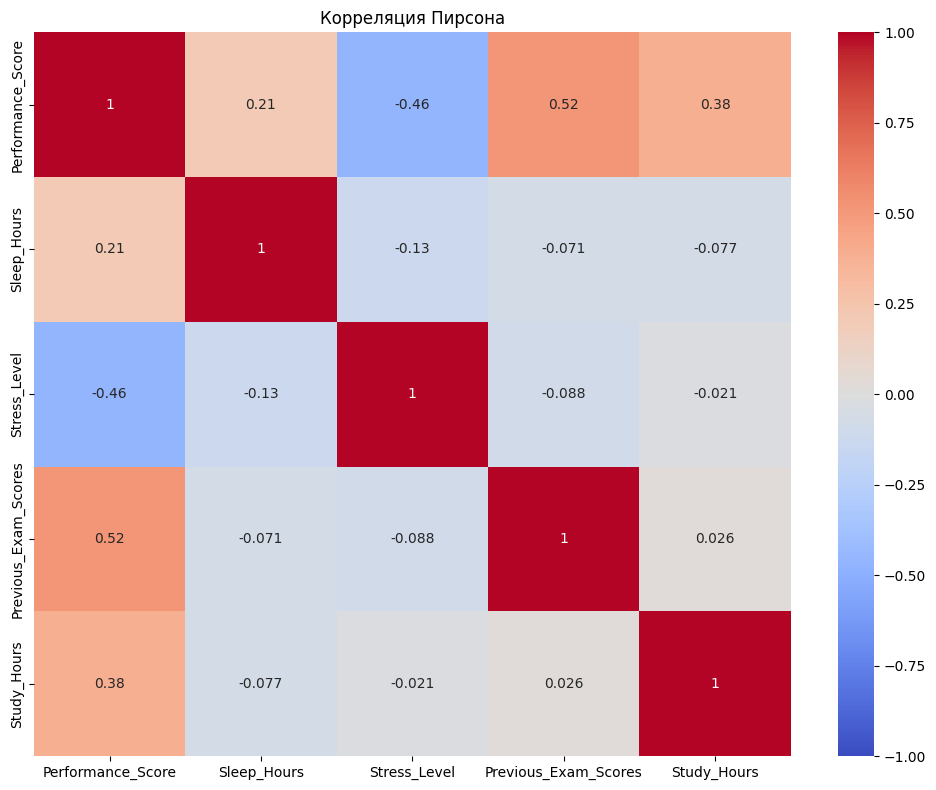

Корреляция независимых переменных с целевой (Performance_Score):
Previous_Exam_Scores: 0.518
Stress_Level: -0.463
Study_Hours: 0.384
Sleep_Hours: 0.209


In [11]:
pearson_corr = df[df.columns.tolist()].corr(method='pearson')

plt.figure(figsize=(10, 8))
sb.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция Пирсона')
plt.tight_layout()
plt.show()

print('Корреляция независимых переменных с целевой (Performance_Score):')
print('===========================')
perfomance_corr = pearson_corr['Performance_Score'].sort_values(key=abs, ascending=False)
for feat, corr_value in perfomance_corr.items():
    if feat != 'Performance_Score':
        print(f'{feat}: {corr_value:.3f}')
print('===========================')


### Анализ результатов:

1. **Previous_Exam_Scores = 0.518** - умеренная положительная корреляция:
    - Ученики с более высокими предыдущими рез-ами склонны показывать лучшие текущие результаты.
2. **Stress_Level = -0.463** - умеренная отрицательная корреляция:
    - Высокий уровень стресса существенно снижает академическую успеваемость.
3. **Study_Hours = 0.384** - слабая положительная корреляция:
    - Увеличение времени учёбы положительно влияет на результаты, но не так сильно как ожидалось бы.
4. **Sleep_Hours = 0.209** - очень слабая положительная корреляция:
    - Кол-во сна имеет минимальное прямое вляние на успеваемость.

**Наибольшее влияние на академическую успеваемость оказывают предыдущие академические результаты и уровень стресса.**
### Расчёт VIF-коэффициентов:

In [12]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler = StandardScaler()
scaler_features = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaler_features, columns=df.columns)

vif_data = pd.DataFrame()
vif_data['Признак'] = scaled_df.columns
vif_data['VIF'] = [variance_inflation_factor(scaled_df.values, idx) for idx in range(len(scaled_df.columns))]

print('VIF коэффициенты после нормализации:')
print(vif_data)
print()

print('============================================')
print('Признаки с мультиколлинеарностью (VIF > 10):')
high_vif = vif_data[vif_data['VIF'] > 10]
if not high_vif.empty:
    for _, row in high_vif.iterrows():
        print(f'\t- {row['Признак']}: {row['VIF']:.2f}')
else:
    print('\tМультиколлинеарность не обнаружена')
print('============================================')


VIF коэффициенты после нормализации:
                Признак       VIF
0     Performance_Score  2.660555
1           Sleep_Hours  1.163228
2          Stress_Level  1.418803
3  Previous_Exam_Scores  1.655445
4           Study_Hours  1.391767

Признаки с мультиколлинеарностью (VIF > 10):
	Мультиколлинеарность не обнаружена


### Анализ результатов:

**Мультколлинеарность отсутствует** - все VIF < 3 *(значительно ниже порога)*:
все переменные могут быть использованы в моделировании без риска дублирования информации. Наибольшая взаимосвязь наблюдается у целевой переменной Performance_Score *(VIF=2.66)*, что ожидаемо (т.к. зависит от других переменных).

## 5. Построение регрессионных моделей (линейной и гребневой).

In [38]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

X = df[['Sleep_Hours', 'Stress_Level', 'Previous_Exam_Scores', 'Study_Hours']]
y = df['Performance_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

print('=' * 18 + '\nЛИНЕЙНАЯ РЕГРЕССИЯ\n' + '=' * 18)

linear_model = LinearRegression()

linear_cv_scores_rmse = -cross_val_score(
    linear_model, 
    X_train_scaled, 
    y_train,
    cv=kf,
    scoring='neg_root_mean_squared_error'
    )
linear_cv_scores_r2 = cross_val_score(
    linear_model, 
    X_train_scaled, 
    y_train, 
    cv=kf, 
    scoring='r2'
    )

print('Кросс-валидация (5 групп):')
print(f'\tRMSE: {linear_cv_scores_rmse.mean():.3f} (+/- {linear_cv_scores_rmse.std() * 2:.3f})')
print(f'\tR²: {linear_cv_scores_r2.mean():.3f} (+/- {linear_cv_scores_r2.std() * 2:.3f})')

linear_model.fit(X_train_scaled, y_train)

y_pred_linear = linear_model.predict(X_test_scaled)

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)
mape_linear = mean_absolute_percentage_error(y_test, y_pred_linear) * 100

print('\nМетрики на тестовой выборке:')
print(f'\tRMSE: {rmse_linear:.3f}')
print(f'\tR²: {r2_linear:.3f}')
print(f'\tMAPE: {mape_linear:.3f}%')

print('\nКоэффициенты линейной регрессии:')
feat_names = X.columns
for feat, coef in zip(feat_names, linear_model.coef_):
    print(f'\t{feat}: {coef:.3f}')
print(f'\tIntercept: {linear_model.intercept_:.3f}')

print('\n' + '=' * 19 + '\nГРЕБНЕВАЯ РЕГРЕССИЯ\n' + '=' * 19)

alphas = np.logspace(-3, 3, 5)
ridge_cv_scores = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    cv_scores = cross_val_score(
        ridge_model, 
        X_train_scaled, 
        y_train, cv=kf, 
        scoring='r2'
        )
    ridge_cv_scores.append(cv_scores.mean())

best_alpha = alphas[np.argmax(ridge_cv_scores)]
print(f'Оптимальный параметр α: {best_alpha:.3f}')

ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train_scaled, y_train)

ridge_cv_scores_rmse = -cross_val_score(
    ridge_model, 
    X_train_scaled, 
    y_train, 
    cv=kf, 
    scoring='neg_root_mean_squared_error'
    )
ridge_cv_scores_r2 = cross_val_score(
    ridge_model,
    X_train_scaled,
    y_train,
    cv=kf,
    scoring='r2'
)

print('Кросс-валидация (5 групп):')
print(f'\tRMSE: {ridge_cv_scores_rmse.mean():.3f} (+/- {ridge_cv_scores_rmse.std() * 2:.3f})')
print(f'\tR²: {ridge_cv_scores_r2.mean():.3f} (+/- {ridge_cv_scores_r2.std() * 2:.3f})')

y_pred_ridge = ridge_model.predict(X_test_scaled)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge) * 100

print('\nМетрики на тестовой выборке:')
print(f'\tRMSE: {rmse_ridge:.3f}')
print(f'\tR²: {r2_ridge:.3f}')
print(f'\tMAPE: {mape_ridge:.3f}%')

print('\nКоэффициенты гребневой регрессии:')
for feat, coef in zip(feat_names, ridge_model.coef_):
    print(f'\t{feat}: {coef:.3f}')
print(f'\tIntercept: {ridge_model.intercept_:.3f}')

print('\n' + '=' * 17 + '\nСРАВНЕНИЕ МОДЕЛЕЙ\n' + '=' * 17)

comparison = pd.DataFrame({
    'Метрика': ['RMSE', 'R²', 'MAPE (%)'],
    'Линейная регрессия': [rmse_linear, r2_linear, mape_linear],
    'Гребневая регрессия': [rmse_ridge, r2_ridge, mape_ridge]
})

print(comparison)

ЛИНЕЙНАЯ РЕГРЕССИЯ
Кросс-валидация (5 групп):
	RMSE: 5.291 (+/- 0.551)
	R²: 0.526 (+/- 0.350)

Метрики на тестовой выборке:
	RMSE: 5.087
	R²: 0.623
	MAPE: 14.740%

Коэффициенты линейной регрессии:
	Sleep_Hours: 2.018
	Stress_Level: -3.101
	Previous_Exam_Scores: 4.182
	Study_Hours: 3.227
	Intercept: 30.940

ГРЕБНЕВАЯ РЕГРЕССИЯ
Оптимальный параметр α: 31.623
Кросс-валидация (5 групп):
	RMSE: 5.359 (+/- 0.702)
	R²: 0.527 (+/- 0.286)

Метрики на тестовой выборке:
	RMSE: 5.037
	R²: 0.631
	MAPE: 15.025%

Коэффициенты гребневой регрессии:
	Sleep_Hours: 1.754
	Stress_Level: -2.834
	Previous_Exam_Scores: 3.720
	Study_Hours: 2.871
	Intercept: 30.940

СРАВНЕНИЕ МОДЕЛЕЙ
    Метрика  Линейная регрессия  Гребневая регрессия
0      RMSE            5.087344             5.037015
1        R²            0.623153             0.630572
2  MAPE (%)           14.740050            15.025472


### Анализ результатов:

1. **Общее качество моделей**:

Обе модели показывают **сопоставимое и достаточно хорошее качество** для прогнозирования успеваемости:
- **R² на тесте ≈ 0.63** - модели объясняют около 63% дисперсии целевой переменной;
- **RMSE ≈ 5.0** - средняя ошибка прогноза составляет 5 баллов;
- **MAPE ≈ 15%** - средняя процентная ошибка прогноза.

2. **Сравнение линейной и гребневой регрессии**:

**Гребневая регрессия показала себя незначительно, но стабильно лучше** по основным метрикам на тестовой выборке:
- **Лучший R² (0.631 против 0.623)** и **меньший RMSE *(5.037 против 5.087)*** у гребневой модели говорит о её более высокой предсказательной способности на новых данных.
- При этом **MAPE гребневой регрессии чуть выше (15.03% против 14.74%)**. Это незначительное расхождение может быть статистической погрешностью.

3. **Интерпретация влияния признаков**:

Коэффициенты обеих моделей имеют **одинаковую направленность**, что подтверждает устойчивость найденных зависимостей. Ранжирование влияния признаков также совпадает.
**Рейтинг факторов по силе влияния** (на основе коэффициентов линейной модели):
1) Previous_Exam_Scores ***(4.18)***: Наибольшее положительное влияние. Успеваемость в прошлом является самым сильным предсказателем успеваемости в будущем.
2) Stress_Level ***(-3.10)***: Второй по силе фактор, и он отрицательный. Высокий уровень стресса существенно снижает успеваемость.
3) Study_Hours ***(3.23)***: Увеличение количества часов, посвященных учебе, положительно сказывается на результате, что вполне ожидаемо.
4) Sleep_Hours ***(2.02)***: Достаточное количество сна имеет заметное положительное влияние.

**Обе модели показали хорошее и сопоставимое качество (R² ≈ 0.63), но гребневая регрессия демонстрирует немного лучшую обобщающую способность и является более предпочтительной.**

## 6. Устранение мультколлинеарности и снижение размерности признаков с помощью метода главных компонент (PCA)

**Мультиколлинеарность отсутствует (VIF < 2)**, поэтому **PCA** применятся в данном случае в основном для снижения размерности.

Доля объяснённой дисперсии каждой компонентой:
	Компонента 1: 0.286
	Компонента 2: 0.274
	Компонента 3: 0.242
	Компонента 4: 0.198

Суммарная объяснённая дисперсия 4-ёх компонент: 1.000


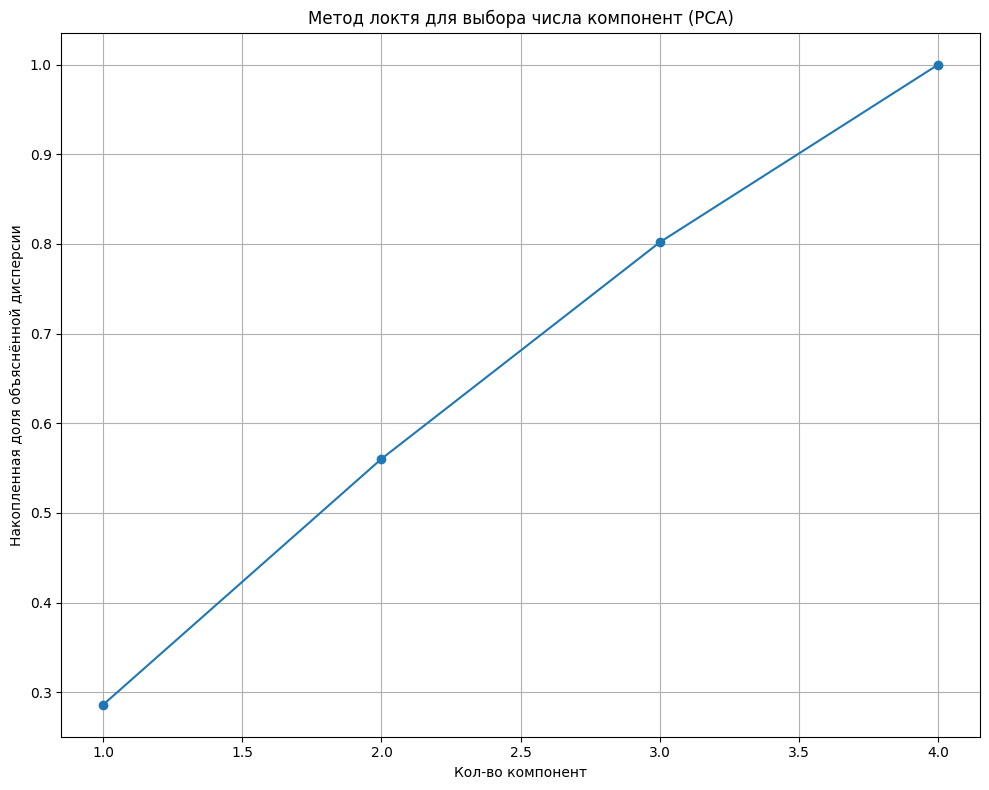

In [39]:
from sklearn.decomposition import PCA

X_scaled = scaler.fit_transform(X)

pca = PCA()
X_PCA = pca.fit_transform(X_scaled)

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

print('Доля объяснённой дисперсии каждой компонентой:')
for i, ratio in enumerate(pca.explained_variance_ratio_, start=1):
    print(f'\tКомпонента {i}: {ratio:.3f}')
print(f'\nСуммарная объяснённая дисперсия 4-ёх компонент: {explained_variance_ratio[-1]:.3f}')

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Метод локтя для выбора числа компонент (PCA)')
plt.xlabel('Кол-во компонент')
plt.ylabel('Накопленная доля объяснённой дисперсии')
plt.grid(True)
plt.tight_layout()
plt.show()

По графику видно, что излом находится примерно на **третьей компоненте**, после чего прирост объяснённой дисперсии замедляется.

| Компонента | Доля объяснённой дисперсии | Накопленная |
|:---|:---|:---|
| 1 | 0.286 | 0.286 |
| 2 | 0.274 | 0.560 |
| 3 | 0.242 | 0.802 |
| 4 | 0.198 | 1.000 |

Первые три компоненты объясняют **≈ 80% дисперсии** (неплохо для компромисса между сжатием и сохранением информации).

## 7. Построение регрессионных моделей по PCA-признакам

In [43]:
pca = PCA(n_components=3)
X_pca_reduced = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=0.2, random_state=42)

print('=' * 24 + '\nЛИНЕЙНАЯ РЕГРЕССИЯ (PCA)\n' + '=' * 24)

linear_model_pca = LinearRegression()

linear_cv_scores_rmse_pca = -cross_val_score(
    linear_model_pca, 
    X_train, 
    y_train, 
    cv=kf, 
    scoring='neg_root_mean_squared_error'
    )
linear_cv_scores_r2_pca = cross_val_score(
    linear_model_pca,
    X_train,
    y_train,
    cv=kf,
    scoring='r2'
)

print('Кросс-валидация (5 групп):')
print(f'\tRMSE: {linear_cv_scores_rmse_pca.mean():.3f} (+/- {linear_cv_scores_rmse_pca.std() * 2:.3f})')
print(f'\tR²: {linear_cv_scores_r2_pca.mean():.3f} (+/- {linear_cv_scores_r2_pca.std() * 2:.3f})')

linear_model_pca.fit(X_train, y_train)
y_pred_linear_pca = linear_model_pca.predict(X_test)

rmse_linear_pca = np.sqrt(mean_squared_error(y_test, y_pred_linear_pca))
r2_linear_pca = r2_score(y_test, y_pred_linear_pca)
mape_linear_pca = mean_absolute_percentage_error(y_test, y_pred_linear_pca) * 100

print('\nМетрики на тестовой выборке:')
print(f'\tRMSE: {rmse_linear_pca:.3f}')
print(f'\tR²: {r2_linear_pca:.3f}')
print(f'\tMAPE: {mape_linear_pca:.3f}%')

print('\nКоэффициенты линейной регрессии (по PCA-компонентам):')
for i, coef in enumerate(linear_model_pca.coef_, start=1):
    print(f'\tPC{i}: {coef:.3f}')
print(f'\tIntercept: {linear_model_pca.intercept_:.3f}')

print('\n' + '=' * 25 + '\nГРЕБНЕВАЯ РЕГРЕССИЯ (PCA)\n' + '=' * 25)
ridge_cv_scores.clear()

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    cv_score = cross_val_score(ridge, X_train, y_train, cv=kf, scoring='r2').mean()
    ridge_cv_scores.append(cv_score)

best_alpha = alphas[np.argmax(ridge_cv_scores)]
print(f'Оптимальный параметр α: {best_alpha:.3f}')

ridge_model_pca = Ridge(alpha=best_alpha)
ridge_model_pca.fit(X_train, y_train)

ridge_cv_scores_rmse_pca = -cross_val_score(
    ridge_model_pca, 
    X_train, 
    y_train, 
    cv=kf, 
    scoring='neg_root_mean_squared_error'
    )
ridge_cv_scores_r2_pca = cross_val_score(
    ridge_model_pca,
    X_train,
    y_train,
    cv=kf,
    scoring='r2'
)

print('Кросс-валидация (5 групп):')
print(f'\tRMSE: {ridge_cv_scores_rmse_pca.mean():.3f} (+/- {ridge_cv_scores_rmse_pca.std() * 2:.3f})')
print(f'\tR²: {ridge_cv_scores_r2_pca.mean():.3f} (+/- {ridge_cv_scores_r2_pca.std() * 2:.3f})')

y_pred_ridge_pca = ridge_model_pca.predict(X_test)

rmse_ridge_pca = np.sqrt(mean_squared_error(y_test, y_pred_ridge_pca))
r2_ridge_pca = r2_score(y_test, y_pred_ridge_pca)
mape_ridge_pca = mean_absolute_percentage_error(y_test, y_pred_ridge_pca) * 100

print('\nМетрики на тестовой выборке:')
print(f'\tRMSE: {rmse_ridge_pca:.3f}')
print(f'\tR²: {r2_ridge_pca:.3f}')
print(f'\tMAPE: {mape_ridge_pca:.3f}%')

print('\nКоэффициенты гребневой регрессии (по PCA-компонентам):')
for i, coef in enumerate(ridge_model_pca.coef_, start=1):
    print(f'\tPC{i}: {coef:.4f}')
print(f'\tIntercept: {ridge_model_pca.intercept_:.3f}')

comparison_pca = pd.DataFrame({
    'Метрика': ['RMSE', 'R²', 'MAPE (%)'],
    'Линейная регрессия (PCA)': [rmse_linear_pca, r2_linear_pca, mape_linear_pca],
    'Гребневая регрессия(PCA)': [rmse_ridge_pca, r2_ridge_pca, mape_ridge_pca]
})

print('\n' + '=' * 27 + '\nСРАВНЕНИЕ МОДЕЛЕЙ ПОСЛЕ PCA\n' + '=' * 27)
print(comparison_pca)

ЛИНЕЙНАЯ РЕГРЕССИЯ (PCA)
Кросс-валидация (5 групп):
	RMSE: 5.525 (+/- 0.865)
	R²: 0.480 (+/- 0.441)

Метрики на тестовой выборке:
	RMSE: 5.146
	R²: 0.614
	MAPE: 14.819%

Коэффициенты линейной регрессии (по PCA-компонентам):
	PC1: 2.026
	PC2: 5.713
	PC3: 1.139
	Intercept: 31.052

ГРЕБНЕВАЯ РЕГРЕССИЯ (PCA)
Оптимальный параметр α: 31.623
Кросс-валидация (5 групп):
	RMSE: 5.582 (+/- 0.973)
	R²: 0.485 (+/- 0.356)

Метрики на тестовой выборке:
	RMSE: 5.148
	R²: 0.614
	MAPE: 15.089%

Коэффициенты гребневой регрессии (по PCA-компонентам):
	PC1: 1.8017
	PC2: 5.1266
	PC3: 1.0146
	Intercept: 31.040

СРАВНЕНИЕ МОДЕЛЕЙ ПОСЛЕ PCA
    Метрика  Линейная регрессия (PCA)  Гребневая регрессия(PCA)
0      RMSE                  5.146173                  5.147887
1        R²                  0.614387                  0.614130
2  MAPE (%)                 14.818944                 15.088645


### Сравнение моделей регресии: исходные данные / PCA

#### 1. Линейная регрессия

| Данные | RMSE | R² | MAPE (%) |
|---|---|---|---|
| Исходные | 5.087 | 0.623 | 14.74 |
| PCA | 5.146 | 0.614 | 14.82 |

**Вывод:**
- Переход на PCA почти не изменил качество модели;
- RMSE и R² слегка ухудшили, MAPE практически не изменился;
- Коэффициенты по PCA-компонентам труднее интерпретировать по исходным признакам.

---

#### 2. Гребневая регрессия
| Данные | RMSE | R² | MAPE (%) |
|---|---|---|---|
| Исходные | 5.037 | 0.631 | 15.03 |
| PCA | 5.148 | 0.614 | 15.09 |

**Вывод:**
- Качество модели на исходных данных немного лучше, чем на PCA-компонентах;
- Гребневая регрессия с PCA почти не выигрывает по метрикам, но даёт немного *"сглаженные"* коэффициенты.

---

#### Сравнение методов на исходных данных и PCA

| Метод | Данные | RMSE | R² | MAPE (%) |
|:---:|---|---|---|---|
| Линейная регрессия | Исходные | 5.087 | 0.623 | 14.74 |
| Линейная регрессия | PCA | 5.146 | 0.614 | 14.82 |
| Гребневая регрессия | Исходные | 5.037 | 0.631 | 15.03 |
| Гребневая регрессия | PCA | 5.148 | 0.614 | 15.09 |

**Общие выводы:**
1. На этих данных PCA не даёт ощутимого прироста качества моделей;
2. Наилучший результат по RMSE и R² показала гребневая регрессия на исходных данных;